<a href="https://colab.research.google.com/github/marelycarcamo/challenge2-TelecomX/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **DESAFIO TELECOMX LATAM**
---

## Descripción del Proyecto

Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

Tu desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

### Objetivo: Análisis de Evasión de Clientes

---
#📌 Extracción
---

### Obtener Datos
Importar los datos de la API de Telecom X. Estos datos están disponibles en formato JSON y contienen información esencial sobre los clientes, incluyendo datos demográficos, tipo de servicio contratado y estado de evasión.

In [1270]:
#Importar librerías
import requests
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [1271]:
url = 'https://raw.githubusercontent.com/marelycarcamo/challenge2-TelecomX/refs/heads/main/TelecomX_Data.json'
# Descargar datos
response = requests.get(url)
datos_json = response.json()
datos_json[0]

{'customerID': '0002-ORFBO',
 'Churn': 'No',
 'customer': {'gender': 'Female',
  'SeniorCitizen': 0,
  'Partner': 'Yes',
  'Dependents': 'Yes',
  'tenure': 9},
 'phone': {'PhoneService': 'Yes', 'MultipleLines': 'No'},
 'internet': {'InternetService': 'DSL',
  'OnlineSecurity': 'No',
  'OnlineBackup': 'Yes',
  'DeviceProtection': 'No',
  'TechSupport': 'Yes',
  'StreamingTV': 'Yes',
  'StreamingMovies': 'No'},
 'account': {'Contract': 'One year',
  'PaperlessBilling': 'Yes',
  'PaymentMethod': 'Mailed check',
  'Charges': {'Monthly': 65.6, 'Total': '593.3'}}}

#📊 Carga y análisis

#### **Objetivo**
Analizar las relaciones, distribuciones y calidad de los datos tabulares.

#### Crear un Dataframe
Aplanar el dataset creando el dataframe.

In [1272]:
# 1. Crear DataFrame
df = pd.json_normalize(datos_json, sep='_')

#### 1. Primer Vistazo a los Datos.
Comprender la estructura básica de los datos con los 5 primeros registros.

In [1273]:
# Visualizar 10 registros para comprender su estructura.
df.sample(20)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
5713,7808-DVWEP,No,Male,0,Yes,No,3,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.00,49.65
2120,2978-XXSOG,No,Female,0,No,No,22,Yes,Yes,DSL,...,No,No,Yes,No,No,Month-to-month,Yes,Mailed check,59.05,1253.5
4119,5649-TJHOV,Yes,Male,1,Yes,No,27,No,No phone service,DSL,...,No,No,No,No,Yes,Month-to-month,No,Bank transfer (automatic),36.50,1032
2711,3754-DXMRT,Yes,Male,1,No,No,2,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.15,92.65
6687,9206-GVPEQ,Yes,Male,0,Yes,No,13,No,No phone service,DSL,...,No,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,54.45,706.85
3840,5249-QYHEX,No,Female,0,Yes,Yes,40,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.80,1024.7
5672,7750-EYXWZ,No,Female,0,No,No,12,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3
6235,8580-AECUZ,Yes,Male,1,No,No,1,Yes,No,Fiber optic,...,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.10,79.1
4354,5976-JCJRH,Yes,Male,0,Yes,No,10,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.30,738.2
6516,8957-THMOA,No,Female,0,No,Yes,50,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.15,970.85


#### 3. **Conocer Tipo de Datos**
- Identificar formato de variables y primeros indicios de nulos.
- **Resultado:** float64(1), int64(2), object(18).

In [1274]:
# 3. Verificar tipos de datos y nulos por columna
print(f"\nDimensiones: {df.shape[0]} filas, {df.shape[1]} columnas\n")
df.info()


Dimensiones: 7267 filas, 21 columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_

In [1275]:
#### Corrección de nombres de columnas
df = df.rename(columns={
    'internet_StreamingWovies': 'internet_StreamingMovies',
    'customer_Dependency': 'customer_Dependents',
    'phone_PhonesService': 'phone_PhoneService'
})

df.columns.tolist()

['customerID',
 'Churn',
 'customer_gender',
 'customer_SeniorCitizen',
 'customer_Partner',
 'customer_Dependents',
 'customer_tenure',
 'phone_PhoneService',
 'phone_MultipleLines',
 'internet_InternetService',
 'internet_OnlineSecurity',
 'internet_OnlineBackup',
 'internet_DeviceProtection',
 'internet_TechSupport',
 'internet_StreamingTV',
 'internet_StreamingMovies',
 'account_Contract',
 'account_PaperlessBilling',
 'account_PaymentMethod',
 'account_Charges_Monthly',
 'account_Charges_Total']

In [1276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [1277]:
df.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [1278]:
# Función de limpieza

def generar_reporte_limpieza(df):
    reporte = {}

    filas, columnas = df.shape
    reporte['filas'], reporte['columnas'] = filas, columnas

    # Valores nulos
    nulos = df.isnull().sum()
    reporte['nulos'] = nulos.to_dict()

    # Celdas vacías (evitando FutureWarning)
    vacíos = df.apply(lambda col: col.astype(str).map(lambda x: x.strip() == '')).sum()
    reporte['vacíos'] = vacíos.to_dict()

    # Duplicados
    duplicados = df.duplicated().sum()
    reporte['duplicados'] = duplicados

    # Tipos de datos
    tipos = df.dtypes.apply(str)
    reporte['tipos_de_dato'] = tipos.to_dict()

    # Valores únicos
    únicos = df.nunique()
    reporte['valores_únicos'] = únicos.to_dict()

    # Filas completamente vacías
    filas_vacías = df.isnull().all(axis=1).sum()
    reporte['filas_completamente_vacías'] = filas_vacías

    # Informe
    print("===== REPORTE DE LIMPIEZA =====")
    print(f"Dimensiones del DataFrame: {filas} filas x {columnas} columnas\n")

    print("Valores nulos por columna:")
    for col, count in nulos.items():
        print(f"  {col}: {count}")

    print("\nCeldas vacías por columna:")
    for col, count in vacíos.items():
        print(f"  {col}: {count}")

    print(f"\nFilas duplicadas: {duplicados}")

    print("\nTipos de datos:")
    for col, tipo in tipos.items():
        print(f"  {col}: {tipo}")

    print("\nValores únicos por columna:")
    for col, count in únicos.items():
        print(f"  {col}: {count}")



    filas, columnas = df.shape
    reporte['filas'], reporte['columnas'] = filas, columnas

    # Valores nulos
    nulos = df.isnull().sum()
    columnas_con_nulos = nulos[nulos > 0]
    reporte['nulos'] = nulos.to_dict()

    # Celdas vacías
    vacíos = df.apply(lambda col: col.astype(str).map(lambda x: x.strip() == '')).sum()
    columnas_con_vacíos = vacíos[vacíos > 0]
    reporte['vacíos'] = vacíos.to_dict()

    # Duplicados fila completa
    duplicados = df.duplicated().sum()
    reporte['duplicados'] = duplicados

    # Tipos de datos y valores únicos
    reporte['tipos_de_dato'] = df.dtypes.apply(str).to_dict()
    reporte['valores_únicos'] = df.nunique().to_dict()

    # Filas completamente vacías
    filas_vacías = df.isnull().all(axis=1).sum()
    reporte['filas_completamente_vacías'] = filas_vacías

    # ==== Impresión de resumen amigable ====
    print("\n\n===== RESUMEN DEL ANÁLISIS 🕵🏻=====")
    if duplicados > 0:
        print(f"- Se encontraron {duplicados} filas duplicadas ➤ df.drop_duplicates(inplace=True)")

    if not columnas_con_nulos.empty:
        print(f"- {len(columnas_con_nulos)} columnas contienen valores nulos:")
        for col in columnas_con_nulos.index:
            print(f"   • {col}: {columnas_con_nulos[col]} nulos")


    if not columnas_con_vacíos.empty:
        print(f"- {len(columnas_con_vacíos)} columnas contienen celdas vacías (espacios o texto vacío):")
        for col in columnas_con_vacíos.index:
            print(f"   • {col}: {columnas_con_vacíos[col]} vacíos")


    if filas_vacías > 0:
        print(f"- Hay {filas_vacías} filas completamente vacías ➤ df.dropna(how='all', inplace=True)")

    if duplicados == 0 and filas_vacías == 0 and columnas_con_nulos.empty and columnas_con_vacíos.empty:
        print("- No se encontraron problemas. ¡El dataset está limpio y listo para usar! 🎉")
    return reporte

In [1279]:
#Generar reporte con la función 'generar_reporte_limpieza'
reporte = generar_reporte_limpieza(df)

===== REPORTE DE LIMPIEZA =====
Dimensiones del DataFrame: 7267 filas x 21 columnas

Valores nulos por columna:
  customerID: 0
  Churn: 0
  customer_gender: 0
  customer_SeniorCitizen: 0
  customer_Partner: 0
  customer_Dependents: 0
  customer_tenure: 0
  phone_PhoneService: 0
  phone_MultipleLines: 0
  internet_InternetService: 0
  internet_OnlineSecurity: 0
  internet_OnlineBackup: 0
  internet_DeviceProtection: 0
  internet_TechSupport: 0
  internet_StreamingTV: 0
  internet_StreamingMovies: 0
  account_Contract: 0
  account_PaperlessBilling: 0
  account_PaymentMethod: 0
  account_Charges_Monthly: 0
  account_Charges_Total: 0

Celdas vacías por columna:
  customerID: 0
  Churn: 224
  customer_gender: 0
  customer_SeniorCitizen: 0
  customer_Partner: 0
  customer_Dependents: 0
  customer_tenure: 0
  phone_PhoneService: 0
  phone_MultipleLines: 0
  internet_InternetService: 0
  internet_OnlineSecurity: 0
  internet_OnlineBackup: 0
  internet_DeviceProtection: 0
  internet_TechSuppor

In [1280]:
# Vacíos o en blanco
df.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,224
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


In [1281]:
#Cambiando la columna "account.Charges.Total" a Float

df['account_Charges_Total'] = pd.to_numeric(df['account_Charges_Total'], errors='coerce')
print(df['account_Charges_Total'].dtype)

float64


In [1282]:
# Eliminando los registros de Churn

df = df[df['Churn'].str.strip() != '']
print("Número de filas después de eliminar las vacías en 'Churn':", len(df))

Número de filas después de eliminar las vacías en 'Churn': 7043


In [1283]:
# Verificar vacios en columna Churn y columna account_Changes_Total
# Vacíos o en blanco
df.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


In [1284]:
# Contar los valores únicos en cada columna
print(df.nunique())

customerID                   7043
Churn                           2
customer_gender                 2
customer_SeniorCitizen          2
customer_Partner                2
customer_Dependents             2
customer_tenure                73
phone_PhoneService              2
phone_MultipleLines             3
internet_InternetService        3
internet_OnlineSecurity         3
internet_OnlineBackup           3
internet_DeviceProtection       3
internet_TechSupport            3
internet_StreamingTV            3
internet_StreamingMovies        3
account_Contract                3
account_PaperlessBilling        2
account_PaymentMethod           4
account_Charges_Monthly      1585
account_Charges_Total        6530
dtype: int64


---
#🔧 Transformación
---

In [1285]:
# =============================================================================
# 1. CONVERSIÓN DE COLUMNAS DE "SÍ/NO" A BINARIAS (1/0)
# =============================================================================

# Lista de columnas que contienen respuestas de Sí/No que queremos convertir
columnas_binarias = [
    'Churn',                   # ¿Abandonó el cliente?
    'customer_Partner',        # ¿Tiene pareja?
    'customer_Dependents',     # ¿Tiene dependientes?
    'phone_PhoneService',      # ¿Tiene servicio telefónico?
    'account_PaperlessBilling' # ¿Usa facturación digital?
]

# Recorremos cada columna en la lista
for columna in columnas_binarias:

    # Verificamos si la columna existe en el dataframe
    if columna in df.columns:

        # Antes de cambiar, mostramos cómo lucen los valores originales
        print(f"\nValores únicos en '{columna}' ANTES de conversión:")
        print(df[columna].value_counts(dropna=False))

        # Aplicamos la conversión a binario
        # - Donde diga "Yes" ponemos 1
        # - Donde diga "No" ponemos 0
        df[columna] = df[columna].map({'Yes': 1, 'No': 0})

        # Mostramos los resultados después del cambio
        print(f"\nValores únicos en '{columna}' DESPUÉS de conversión:")
        print(df[columna].value_counts(dropna=False))
        print(f"✓ Columna '{columna}' convertida a binario")

    else:
        print(f"\n⚠ Advertencia: La columna '{columna}' no existe en el dataframe")


Valores únicos en 'Churn' ANTES de conversión:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Valores únicos en 'Churn' DESPUÉS de conversión:
Churn
0    5174
1    1869
Name: count, dtype: int64
✓ Columna 'Churn' convertida a binario

Valores únicos en 'customer_Partner' ANTES de conversión:
customer_Partner
No     3641
Yes    3402
Name: count, dtype: int64

Valores únicos en 'customer_Partner' DESPUÉS de conversión:
customer_Partner
0    3641
1    3402
Name: count, dtype: int64
✓ Columna 'customer_Partner' convertida a binario

Valores únicos en 'customer_Dependents' ANTES de conversión:
customer_Dependents
No     4933
Yes    2110
Name: count, dtype: int64

Valores únicos en 'customer_Dependents' DESPUÉS de conversión:
customer_Dependents
0    4933
1    2110
Name: count, dtype: int64
✓ Columna 'customer_Dependents' convertida a binario

Valores únicos en 'phone_PhoneService' ANTES de conversión:
phone_PhoneService
Yes    6361
No      682
Name: count, dtype: int64

Valores ú

In [1286]:
df.sample(3)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
6248,8597-CWYHH,0,Male,0,0,0,43,1,Yes,Fiber optic,...,No,No,No,Yes,Yes,One year,0,Mailed check,94.35,3921.30
989,1393-IMKZG,0,Female,0,0,0,1,1,No,Fiber optic,...,No,No,Yes,Yes,Yes,Month-to-month,1,Electronic check,95.85,95.85
4073,5572-ZDXHY,1,Female,0,0,0,22,1,No,Fiber optic,...,Yes,No,No,No,Yes,Month-to-month,1,Mailed check,84.30,1855.65


In [1287]:
# =============================================================================
# MANEJO DE COLUMNAS CON MÚLTIPLES VALORES (YES/NO/NO SERVICE)
# =============================================================================

"""
Problema:
- Algunas columnas como servicios adicionales tienen 3 valores posibles:
  • "Yes" (tiene el servicio adicional)
  • "No" (no tiene el servicio adicional)
  • "No internet service" (no tiene servicio base de internet)

Solución:
1. Identificar las columnas problemáticas
2. Convertir "No internet service" a "No" (0) porque:
   - Si no tiene el servicio base, es equivalente a no tener el servicio adicional
   - Mantiene la lógica binaria
3. Luego aplicar la conversión estándar a binario
"""

# Lista de columnas con valores múltiples (basado en tu análisis previo)
columnas_multivalor = [
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies',
    'phone_MultipleLines'  # Esta puede tener "No phone service"
]

# Recorremos cada columna problemática
for columna in columnas_multivalor:

    # Verificamos si la columna existe
    if columna in df.columns:

        print(f"\nProcesando columna compleja: {columna}")
        print("Valores únicos ANTES de limpieza:")
        print(df[columna].value_counts(dropna=False))

        # Paso 1: Convertir valores de "no service" a "No"
        # - Esto normaliza las respuestas
        df[columna] = df[columna].replace({
            'No internet service': 'No',
            'No phone service': 'No',
        })

        print("\nValores después de convertir 'No service' a 'No':")
        print(df[columna].value_counts(dropna=False))

        # Paso 2: Ahora aplicamos la conversión binaria estándar
        df[columna] = df[columna].map({'Yes': 1, 'No': 0})

        print("\nValores DESPUÉS de conversión binaria:")
        print(df[columna].value_counts(dropna=False))
        print(f"✓ Columna {columna} normalizada y convertida a binario")

    else:
        print(f"\n⚠ La columna {columna} no existe en el DataFrame")



Procesando columna compleja: internet_OnlineSecurity
Valores únicos ANTES de limpieza:
internet_OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

Valores después de convertir 'No service' a 'No':
internet_OnlineSecurity
No     5024
Yes    2019
Name: count, dtype: int64

Valores DESPUÉS de conversión binaria:
internet_OnlineSecurity
0    5024
1    2019
Name: count, dtype: int64
✓ Columna internet_OnlineSecurity normalizada y convertida a binario

Procesando columna compleja: internet_OnlineBackup
Valores únicos ANTES de limpieza:
internet_OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

Valores después de convertir 'No service' a 'No':
internet_OnlineBackup
No     4614
Yes    2429
Name: count, dtype: int64

Valores DESPUÉS de conversión binaria:
internet_OnlineBackup
0    4614
1    2429
Name: count, dtype: int64
✓ Columna internet_Online

In [1288]:
df.sample(3)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
6274,8630-QSGXK,0,Male,0,1,0,51,1,1,DSL,...,0,0,1,1,1,Two year,1,Bank transfer (automatic),75.20,3901.25
3000,4163-NCJAK,0,Female,0,1,0,46,1,1,No,...,0,0,0,0,0,One year,1,Bank transfer (automatic),24.45,1066.15
243,0365-BZUWY,0,Male,0,1,0,17,1,1,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,102.55,1742.50


In [1289]:
# Calculate daily charges
df['Cuentas_Diarias'] = df['account_Charges_Monthly'] / 30

# Display the monthly and daily charges for the first few rows
display(df[['account_Charges_Monthly', 'Cuentas_Diarias']].head())

# Remove the temporary 'Cuentas_Diarias' column if it's not needed later
# df_plano = df.drop('Cuentas_Diarias', axis=1, errors='ignore') # Uncomment if you want to drop the column

,account_Charges_Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [1290]:
df.columns.tolist()[-1:]

['Cuentas_Diarias']

### Análisis Descriptivo

In [1291]:
df.describe()

,Churn,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_PaperlessBilling,account_Charges_Monthly,account_Charges_Total,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2283.300441,2.158723
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.771362,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,401.450000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3794.737500,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


### Visualizaciones

In [1292]:
pip install plotly

#### 7. Distribución de Evasión
**OBJETIVO:** Comprender la distribución de la variable "churn" (evasión) entre los clientes.

###### Recuento de Evasión por Variables Categóricas

In [1293]:
# Distribución de la variable objetivo 'Churn'

import pandas as pd
import plotly.express as px

# Suponiendo que ya tienes tu DataFrame llamado df y la columna 'Churn'
# Paso 1: Contar los valores de 'Churn'
churn_counts = df['Churn'].value_counts().reset_index()
churn_counts.columns = ['Churn', 'Cantidad']

# Paso 2: Opcional - renombrar valores si son booleanos o 0/1
etiquetas = {0: 'No Evasión', 1: 'Evasión'}
churn_counts['Churn'] = churn_counts['Churn'].map(etiquetas)

# Paso 3: Crear el gráfico de pastel interactivo
fig = px.pie(
    churn_counts,
    names='Churn',             # Nombre que aparecerá en cada sector
    values='Cantidad',         # Tamaño de cada sector
    title='Distribución de Clientes con Evasión',
    color='Churn',             # Asegura que los colores estén bien asignados
    color_discrete_map={'No Evasión': 'mediumseagreen', 'Evasión': 'orchid'}, # Personalización de colores
    hole=0.4                   # Si deseas un donut chart, pon 0.4, si no, déjalo en 0
)


# Paso 4: Personalizar etiquetas y diseño
fig.update_traces(
    textinfo='label+percent',   # Muestra el nombre y porcentaje
    insidetextfont=dict(color='white', size=14)

)

fig.update_layout(
     title=dict(
        text='Distribución de Evasión',  # Título
        x=0.5,                        # Centrado (x=0.5)
        font=dict(size=20, color='white')  # Tamaño 20 y color blanco para el título
    ),
    font=dict(
        size=14,                      # Tamaño de fuente 14 para el gráfico en general
        color='white'                 # Color blanco para los textos del gráfico
    ),
    title_font_size=20,
    legend_title='Categoría',
    legend=dict(orientation="h", y=-0.1),
    margin=dict(t=50, l=50, r=50, b=50),
     # Opcional: Personaliza el fondo para que luzca más profesional (transparente en este caso)
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)'

)

 # Opcional: Personaliza el fondo para que luzca más profesional (transparente en este caso)


fig.show()

In [1302]:
# import plotly.express as px

# # Verifica los valores únicos en 'Churn'
# print("Valores únicos en Churn antes del mapeo:", df['Churn'].unique())

# # Mapea los valores de Churn, solo si son 0 o 1
# df['Churn'] = df['Churn'].apply(lambda x: 'No Evasión' if x == 0 else ('Evasión' if x == 1 else x))

# # Verifica los valores únicos después del mapeo
# print("Valores únicos en Churn después del mapeo:", df['Churn'].unique())

# Genera el gráfico con la configuración deseada
fig = px.histogram(
    df,
    x='customer_gender',
    color='Churn',
    color_discrete_map={
        'No Evasión': 'mediumseagreen',
        'Evasión': 'orchid'
    },
    barmode='group',
    title='Comparativa de la Distribución de Evasión por Género',
    text_auto=True
)

fig.update_traces(
    insidetextfont=dict(color='white', size=14)
)

fig.update_layout(
    title=dict(
        text='Comparativa de la Distribución de Evasión por Género',
        x=0.5,
        font=dict(size=20, color='white')
    ),
    font=dict(
        size=14,
        color='white'
    ),
    legend=dict(
        title='Estado de Churn',
        font=dict(size=14, color='white')
    ),
    xaxis=dict(
        title=dict(
            text='Género del Cliente',
            font=dict(size=14, color='white')
        ),
        tickfont=dict(size=14, color='white')
    ),
    yaxis=dict(
        title=dict(
            text='Cantidad',
            font=dict(size=14, color='white')
        ),
        tickfont=dict(size=14, color='white')
    ),
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)'
)

fig.show()


In [1295]:
# Crear el histograma con Plotly Express:
fig = px.histogram(
    df,
    x='account_Contract',                                   # Variable categórica (género en este caso)
    color='Churn',                                         # Separamos las barras por estado de Churn
    color_discrete_map={                                   # Asignamos colores personalizados
        'No Evasión': 'mediumseagreen',
        'Evasión': 'orchid'
    },
    barmode='group',                                      # Las barras se agrupan lado a lado
    title='Distribución de Evasión por Contrato',
    text_auto=True                                        # Muestra automáticamente el conteo sobre cada barra
)

fig.update_traces(
    insidetextfont=dict(color='white', size=14)
)

# Personalizamos el layout del gráfico:
fig.update_layout(
    title=dict(
        text='Distribución de Evasión por Contrato',  # Título
        x=0.5,                        # Centrado (x=0.5)
        font=dict(size=20, color='white')  # Tamaño 20 y color blanco para el título
    ),
    font=dict(
        size=14,                      # Tamaño de fuente 14 para el gráfico en general
        color='white'                 # Color blanco para los textos del gráfico
    ),
    legend=dict(
        title='Estado de Churn',      # Título de la leyenda
        font=dict(size=14, color='white')
    ),
    xaxis=dict(
        title=dict(
            text='Duración del Contrato',    # Etiqueta para el eje x
            font=dict(size=14, color='white')
        ),
        tickfont=dict(size=14, color='white')
    ),
    yaxis=dict(
        title=dict(
            text='Cantidad',              # Etiqueta para el eje y
            font=dict(size=14, color='white')
        ),
        tickfont=dict(size=14, color='white')
    ),
    # Opcional: Personaliza el fondo para que luzca más profesional (transparente en este caso)
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)'
)

# Muestra el gráfico de forma interactiva.
fig.show()

In [1301]:
px.histogram(df, x = 'account_PaymentMethod', text_auto = True, color = 'Churn',   color_discrete_map={'No Evasión': 'mediumseagreen', 'Evasión': 'orchid'}, barmode = 'group',title="Distribución de Evasión por Método de Pago")


import plotly.express as px

# Verifica los valores únicos en 'Churn'
print("Valores únicos en Churn antes del mapeo:", df['Churn'].unique())

# Mapea los valores de Churn, solo si son 0 o 1
df['Churn'] = df['Churn'].apply(lambda x: 'No Evasión' if x == 0 else ('Evasión' if x == 1 else x))

# Verifica los valores únicos después del mapeo
print("Valores únicos en Churn después del mapeo:", df['Churn'].unique())

# Genera el gráfico con la configuración deseada
fig = px.histogram(
    df,
    x='account_PaymentMethod',
    color='Churn',
    color_discrete_map={
        'No Evasión': 'mediumseagreen',
        'Evasión': 'orchid'
    },
    barmode='group',
    title='Distribución de Evasión por Método de Pago',
    text_auto=True
)

fig.update_traces(
    insidetextfont=dict(color='white', size=14)
)

fig.update_layout(
    title=dict(
        text='Distribución de Evasión por Método de Pago',
        x=0.5,
        font=dict(size=20, color='white')
    ),
    font=dict(
        size=14,
        color='white'
    ),
    legend=dict(
        title='Estado de Churn',
        font=dict(size=14, color='white')
    ),
    xaxis=dict(
        title=dict(
            text='Género del Cliente',
            font=dict(size=14, color='white')
        ),
        tickfont=dict(size=14, color='white')
    ),
    yaxis=dict(
        title=dict(
            text='Cantidad',
            font=dict(size=14, color='white')
        ),
        tickfont=dict(size=14, color='white')
    ),
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)'
)

fig.show()


Valores únicos en Churn antes del mapeo: ['No Evasión' 'Evasión']
Valores únicos en Churn después del mapeo: ['No Evasión' 'Evasión']


##### Conteo de Evasión por Variables Numéricas

#### 9. Correlaciones
- Identificar relaciones entre variables al final del proceso.

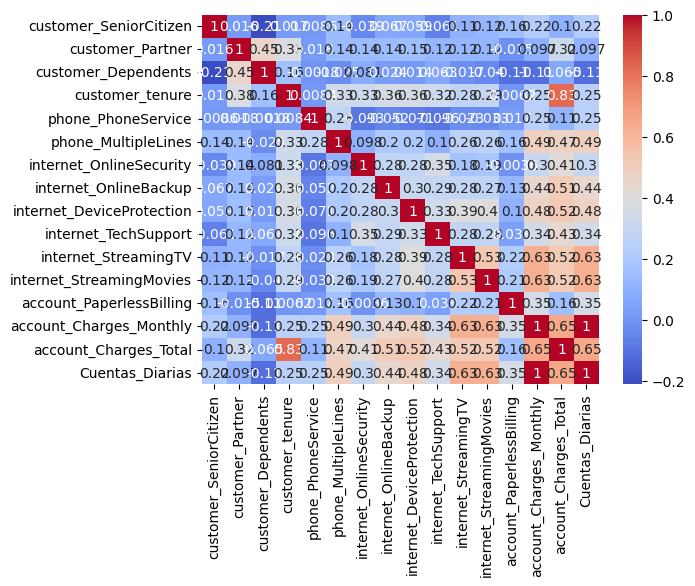

In [1297]:
 # 9. Relaciones entre variables numéricas
df.select_dtypes(include='number').corr()  # Matriz de correlación
#Grafico de correlación
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.show()

In [1298]:
#analiza la distribución para variables clave (tenure, charges)
#Hace un análisis de distribución para variables claves (tenure, charges)


In [1299]:
#Graficar correlaciones con la variable objetivo (Churn)


#📄Informe final